In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp

# Custom imports
import bokeh_tools as bktools
import Presets as bkpresets

# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')

import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst



# Setting default values
#------------------------------------------------
_default_fig_width  = 1500
_default_fig_height = 400
_default_fig_pad    = 100



# Importing Collider and Twiss
#-------------------------------------
# collider = xt.Multiline.from_json('../001_configure_collider/zfruits/collider_001.json')
collider = xt.Multiline.from_json('../001_configure_collider/zfruits/collider_BUNCHED/collider_BUNCH_0220.json')
twiss = {}
twiss['lhcb1'] = collider['lhcb1'].twiss().to_pandas()
twiss['lhcb2'] = collider['lhcb2'].twiss().reverse().to_pandas()
#-------------------------------------


# Filtering twiss to get rid of slices, entries and exits
#-------------------------------------
light_twiss = {}
for sequence in ['lhcb1','lhcb2']:
    light_twiss[sequence] = xPlus.filter_twiss(twiss[sequence].set_index('name'),entries=['drift','..','_entry','_exit']).reset_index()
#-------------------------------------



Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


ca199f5932164798ac13cd1ade45d75e.c:5035:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/pbelanger/ABPLocal/BBStudies/Executables/miniforge3/envs/py-BB/include/python3.11/pyconfig.h:1690:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
ca199f5932164798ac13cd1ade45d75e.c:17803:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
ca199f5932164798ac13cd1ade45d75e.c:18069:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
ca199f5932164798ac13cd1ade45d75e.c:18157:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
ca199f59321647

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


d015a03c448848e98aaf14c586c4fc78.c:5035:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/pbelanger/ABPLocal/BBStudies/Executables/miniforge3/envs/py-BB/include/python3.11/pyconfig.h:1690:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
d015a03c448848e98aaf14c586c4fc78.c:17803:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
d015a03c448848e98aaf14c586c4fc78.c:18069:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
d015a03c448848e98aaf14c586c4fc78.c:18160:12: warning: unused variable 'e_loss_primary_tot' [-Wunused-variable]
    double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
           ^
d015a03c448848e98aaf14c586c4fc78.c:18157:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-varia

Done compiling ContextCpu kernels.


In [128]:
bbho

,name,type,length,s,s_entry,s_exit,strength_x,strength_y
0,bb_ho.l5b1_05,bblr,0.75,6664.862447,6664.487447,6665.237447,[-1.1053489377072461e-16],[-1.0811830053680592e-19]
1,bb_ho.l5b1_04,bblr,0.75,6664.893709,6664.518709,6665.268709,[-7.117789348634239e-17],[-1.0700017203651453e-19]
2,bb_ho.l5b1_03,bblr,0.75,6664.909650,6664.534650,6665.284650,[-4.9145794080708864e-17],[-1.055665792572244e-19]
3,bb_ho.l5b1_02,bblr,0.75,6664.922099,6664.547099,6665.297099,[-3.1271024181330557e-17],[-1.0400306033500529e-19]
4,bb_ho.l5b1_01,bblr,0.75,6664.933064,6664.558064,6665.308064,[-1.5198899584249457e-17],[-1.0228891663945604e-19]
5,bb_ho.c5b1_00,bblr,0.75,6664.943433,6664.568433,6665.318433,[1.4680414410321555e-19],[-9.77869207272009e-20]
6,bb_ho.r5b1_01,bblr,0.75,6664.953801,6664.578801,6665.328801,[1.546096300352351e-17],[-9.81982498178707e-20]
7,bb_ho.r5b1_02,bblr,0.75,6664.964766,6664.589766,6665.339766,[3.148913765045985e-17],[-9.563014563938655e-20]
8,bb_ho.r5b1_03,bblr,0.75,6664.977215,6664.602215,6665.352215,[4.927930007887655e-17],[-9.243642154363624e-20]
9,bb_ho.r5b1_04,bblr,0.75,6664.993156,6664.618156,6665.368156,[7.115579915427227e-17],[-8.802174135029054e-20]


<StemContainer object of 3 artists>

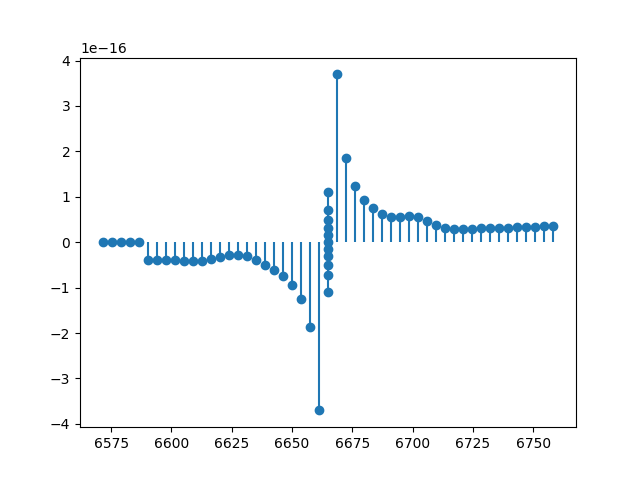

In [17]:
import importlib
importlib.reload(bktools)

bblr = bktools.extract_bblr_info(collider['lhcb1'],twiss['lhcb1'])
# bblr2 = extract_bblr_info(collider['lhcb1'],twiss['lhcb1'])
bbho = bktools.extract_bbho_info(collider['lhcb1'],twiss['lhcb1'])

import matplotlib.pyplot as plt
plt.figure()
plt.stem(bblr[:50].s,bblr[:50].strength_x,basefmt='none')
# plt.stem(bblr2[:50].s,bblr2[:50].strength_y,basefmt='none')
# plt.stem(bbho[:11].s,bbho[:11].strength_y,basefmt='none')
# plt.stem(bbho[22:33].s,bbho[22:33].strength_y,basefmt='none')
plt.stem(bbho[:11].s,bbho[:11].strength_x,basefmt='none')

In [20]:
import importlib
importlib.reload(bktools)

bblr = bktools.extract_bblr_info(collider['lhcb1'],twiss['lhcb1'])
# bblr2 = extract_bblr_info(collider['lhcb1'],twiss['lhcb1'])
bbho = bktools.extract_bbho_info(collider['lhcb1'],twiss['lhcb1'])
bbho

,name,type,length,s,s_entry,s_exit,strength_x,strength_y
0,bb_ho.l5b1_05,bblr,0.75,6664.862447,6664.487447,6665.237447,-1.105349e-16,-1.081183e-19
1,bb_ho.l5b1_04,bblr,0.75,6664.893709,6664.518709,6665.268709,-7.117789e-17,-1.070002e-19
2,bb_ho.l5b1_03,bblr,0.75,6664.909650,6664.534650,6665.284650,-4.914579e-17,-1.055666e-19
3,bb_ho.l5b1_02,bblr,0.75,6664.922099,6664.547099,6665.297099,-3.127102e-17,-1.040031e-19
4,bb_ho.l5b1_01,bblr,0.75,6664.933064,6664.558064,6665.308064,-1.519890e-17,-1.022889e-19
5,bb_ho.c5b1_00,bblr,0.75,6664.943433,6664.568433,6665.318433,1.468041e-19,-9.778692e-20
6,bb_ho.r5b1_01,bblr,0.75,6664.953801,6664.578801,6665.328801,1.546096e-17,-9.819825e-20
7,bb_ho.r5b1_02,bblr,0.75,6664.964766,6664.589766,6665.339766,3.148914e-17,-9.563015e-20
8,bb_ho.r5b1_03,bblr,0.75,6664.977215,6664.602215,6665.352215,4.927930e-17,-9.243642e-20
9,bb_ho.r5b1_04,bblr,0.75,6664.993156,6664.618156,6665.368156,7.115580e-17,-8.802174e-20


In [23]:
bbho.s.diff().min()/2

0.005184250578167848

In [124]:

def compute_bblr_strength(ee_bb,x,y,betx,bety,beta0 = None,flip_x_coord=False):
    # Fixing exmittance since strength should be normalized at the end
    emittxy = [1,1]

    try:
        Nb     = ee_bb.n_particles
        gamma0 = 1/np.sqrt(1-ee_bb.beta0**2) 
        E      = gamma0*xp.PROTON_MASS_EV
        p0     = ee_bb.beta0*E/cst.c
    except:
        Nb     = ee_bb.slices_other_beam_num_particles
        gamma0 = 1/np.sqrt(1-beta0**2) 

    r     = np.sqrt(x**2+y**2)
    sig_x = np.sqrt(betx*emittxy[0])
    sig_y = np.sqrt(bety*emittxy[1])

    kick_factor = 2*cst.r_p*Nb/gamma0
    kick_x = kick_factor*x*(1-np.exp(-r**2/(2*sig_x**2)))/r**2
    kick_y = kick_factor*y*(1-np.exp(-r**2/(2*sig_y**2)))/r**2


    # return strength*ee_bb.scale_strength
    return kick_x*ee_bb.scale_strength,kick_y*ee_bb.scale_strength



def extract_bblr_info(line,twiss):

    # Creating lattice dictionary
    lattice =  {}
    lattice['name']    = []    
    lattice['type']    = []
    lattice['length']  = []
    lattice['s']       = []
    lattice['s_entry'] = []
    lattice['s_exit']  = []
    lattice['strength_x']= []
    lattice['strength_y']= []

    # Iterating through the elements
    all_bblr = line.get_elements_of_type(xf.beam_elements.beambeam2d.BeamBeamBiGaussian2D)
    tw_data  = twiss.set_index('name').loc[all_bblr[1],['s','x','y','betx','bety']]

    # Finding if we need to flip x axis or not
    beam     = all_bblr[1][0].split('_')[1][-2:]
    if beam.lower() == 'b2':
        flip_x_coord = True
    else:
        flip_x_coord = False

    for ee,(name,tw_row) in zip(all_bblr[0],tw_data.iterrows()):
        # print(name,ee.scale_strength,tw_row.s)

        strength_x,strength_y = compute_bblr_strength(ee,tw_row.x,tw_row.y,tw_row.betx,tw_row.bety,flip_x_coord=flip_x_coord)
        length   = 7.5/10
        lattice['name'].append(name)
        lattice['type'].append('bblr')
        lattice['length'].append(length)
        lattice['s'].append(tw_row.s + length/2)
        lattice['s_entry'].append(tw_row.s)
        lattice['s_exit'].append(tw_row.s + length)
        lattice['strength_x'].append(strength_x)
        lattice['strength_y'].append(strength_y)

    return pd.DataFrame(lattice).sort_values(by='s').reset_index(drop=True)



def extract_bbho_info(line,twiss):

    # Creating lattice dictionary
    lattice =  {}
    lattice['name']    = []    
    lattice['type']    = []
    lattice['length']  = []
    lattice['s']       = []
    lattice['s_entry'] = []
    lattice['s_exit']  = []
    lattice['strength_x']= []
    lattice['strength_y']= []

    # Iterating through the elements
    all_bblr = line.get_elements_of_type(xf.beam_elements.beambeam3d.BeamBeamBiGaussian3D)
    tw_data  = twiss.set_index('name').loc[all_bblr[1],['s','x','y','betx','bety']]

    # Finding if we need to flip x axis or not
    beam     = all_bblr[1][0].split('_')[1][-2:]
    if beam.lower() == 'b2':
        flip_x_coord = True
    else:
        flip_x_coord = False

    for ee,(name,tw_row) in zip(all_bblr[0],tw_data.iterrows()):
        # print(name,ee.scale_strength,tw_row.s)

        strength_x,strength_y = compute_bblr_strength(ee,tw_row.x,tw_row.y,tw_row.betx,tw_row.bety,line.particle_ref.beta0[0],flip_x_coord=flip_x_coord)
        length   = 7.5/10
        lattice['name'].append(name)
        lattice['type'].append('bblr')
        lattice['length'].append(length)
        lattice['s'].append(tw_row.s + length/2)
        lattice['s_entry'].append(tw_row.s)
        lattice['s_exit'].append(tw_row.s + length)
        lattice['strength_x'].append(strength_x)
        lattice['strength_y'].append(strength_y)

    return pd.DataFrame(lattice).sort_values(by='s').reset_index(drop=True)


In [120]:
collider['lhcb1'].particle_ref.beta0

LinkedArrayCpu([0.99999999])

In [88]:
## Build particle object on context
n_part = 200
np.random.seed(0)
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part))
particles0 = particles.copy()


all_ho = [name for name in twiss['lhcb1']['name'] if 'bb_ho' in name]
for ee_name in all_ho:
    # print(ee.scale_strength,ee_name)
    ee = collider['lhcb1'].element_dict[ee_name]
    # ee.scale_strength = 0
    ee.track(particles)
    
display(particles0.to_pandas().head(5))
display(particles.to_pandas().head(5))
display(particles.to_pandas()[['x','px','y','py']].head(5) - particles0.to_pandas()[['x','px','y','py']].head(5) )

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0,-0.009200,1.0,1.0,1.0,0,0,...,-0.000395,-0.000004,-0.000020,0.000019,0.000019,1.0,0.999981,6.500000e+12,1.0,6927.628083
1,-1,1.0,9.382721e+08,0.0,0.002794,1.0,1.0,1.0,1,0,...,0.001717,0.000004,-0.000010,-0.000098,-0.000098,1.0,1.000098,6.500000e+12,1.0,6927.628083
2,-1,1.0,9.382721e+08,0.0,-0.001834,1.0,1.0,1.0,2,0,...,-0.001602,-0.000002,0.000011,-0.000005,-0.000005,1.0,1.000005,6.500000e+12,1.0,6927.628083
3,-1,1.0,9.382721e+08,0.0,-0.002452,1.0,1.0,1.0,3,0,...,0.001781,-0.000006,-0.000026,0.000042,0.000042,1.0,0.999958,6.500000e+12,1.0,6927.628083
4,-1,1.0,9.382721e+08,0.0,0.006187,1.0,1.0,1.0,4,0,...,0.001478,-0.000010,0.000006,-0.000091,-0.000091,1.0,1.000091,6.500000e+12,1.0,6927.628083


,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0,-0.009200,1.0,1.0,1.0,0,0,...,-0.000395,-0.000004,-0.000020,0.000019,0.000019,1.0,0.999981,6.500000e+12,1.0,6927.628083
1,-1,1.0,9.382721e+08,0.0,0.002794,1.0,1.0,1.0,1,0,...,0.001717,0.000004,-0.000010,-0.000098,-0.000098,1.0,1.000098,6.500000e+12,1.0,6927.628083
2,-1,1.0,9.382721e+08,0.0,-0.001834,1.0,1.0,1.0,2,0,...,-0.001602,-0.000002,0.000011,-0.000005,-0.000005,1.0,1.000005,6.500000e+12,1.0,6927.628083
3,-1,1.0,9.382721e+08,0.0,-0.002452,1.0,1.0,1.0,3,0,...,0.001781,-0.000006,-0.000026,0.000042,0.000042,1.0,0.999958,6.500000e+12,1.0,6927.628083
4,-1,1.0,9.382721e+08,0.0,0.006187,1.0,1.0,1.0,4,0,...,0.001478,-0.000010,0.000007,-0.000091,-0.000091,1.0,1.000091,6.500000e+12,1.0,6927.628083


,x,px,y,py
0,3.364709e-10,6.023518e-08,-1.364492e-09,-2.949451e-07
1,-2.375710e-11,4.178458e-09,-9.477835e-11,6.948017e-08
2,8.995770e-12,-3.087665e-09,-7.008760e-11,-7.470883e-08
3,4.302056e-12,-9.367833e-09,8.535902e-11,7.096934e-08
4,2.649468e-11,-2.143576e-08,-2.567462e-10,8.456980e-08


,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0,-0.009200,1.0,1.0,1.0,0,0,...,-0.000395,-0.000004,-0.000020,0.000019,0.000019,1.0,0.999981,6.500000e+12,1.0,6927.628083
1,-1,1.0,9.382721e+08,0.0,0.002794,1.0,1.0,1.0,1,0,...,0.001717,0.000004,-0.000010,-0.000098,-0.000098,1.0,1.000098,6.500000e+12,1.0,6927.628083
2,-1,1.0,9.382721e+08,0.0,-0.001834,1.0,1.0,1.0,2,0,...,-0.001602,-0.000002,0.000011,-0.000005,-0.000005,1.0,1.000005,6.500000e+12,1.0,6927.628083
3,-1,1.0,9.382721e+08,0.0,-0.002452,1.0,1.0,1.0,3,0,...,0.001781,-0.000006,-0.000026,0.000042,0.000042,1.0,0.999958,6.500000e+12,1.0,6927.628083
4,-1,1.0,9.382721e+08,0.0,0.006187,1.0,1.0,1.0,4,0,...,0.001478,-0.000010,0.000006,-0.000091,-0.000091,1.0,1.000091,6.500000e+12,1.0,6927.628083


,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0,-0.009200,1.0,1.0,1.0,0,0,...,-0.000395,-0.000004,-0.000020,0.000019,0.000019,1.0,0.999981,6.500000e+12,1.0,6927.628083
1,-1,1.0,9.382721e+08,0.0,0.002794,1.0,1.0,1.0,1,0,...,0.001717,0.000004,-0.000010,-0.000098,-0.000098,1.0,1.000098,6.500000e+12,1.0,6927.628083
2,-1,1.0,9.382721e+08,0.0,-0.001834,1.0,1.0,1.0,2,0,...,-0.001602,-0.000002,0.000011,-0.000005,-0.000005,1.0,1.000005,6.500000e+12,1.0,6927.628083
3,-1,1.0,9.382721e+08,0.0,-0.002452,1.0,1.0,1.0,3,0,...,0.001781,-0.000006,-0.000026,0.000042,0.000042,1.0,0.999958,6.500000e+12,1.0,6927.628083
4,-1,1.0,9.382721e+08,0.0,0.006187,1.0,1.0,1.0,4,0,...,0.001478,-0.000010,0.000007,-0.000091,-0.000091,1.0,1.000091,6.500000e+12,1.0,6927.628083


,x,px,y,py
0,6.741249e-10,1.337696e-07,-2.725294e-09,-5.904749e-07
1,-4.749599e-11,2.139559e-08,-1.895201e-10,1.375260e-07
2,1.799796e-11,6.881324e-09,-1.402335e-10,-1.508387e-07
3,8.609101e-12,-5.674638e-09,1.707577e-10,1.405161e-07
4,5.305796e-11,-2.984503e-08,-5.133493e-10,1.676726e-07


In [52]:
particles0.to_pandas()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0,-0.009200,1.0,1.0,1.0,0,0,...,-0.000395,-0.000004,-1.952050e-05,0.000019,0.000019,1.0,0.999981,6.500000e+12,1.0,6927.628083
1,-1,1.0,9.382721e+08,0.0,0.002794,1.0,1.0,1.0,1,0,...,0.001717,0.000004,-1.032072e-05,-0.000098,-0.000098,1.0,1.000098,6.500000e+12,1.0,6927.628083
2,-1,1.0,9.382721e+08,0.0,-0.001834,1.0,1.0,1.0,2,0,...,-0.001602,-0.000002,1.082092e-05,-0.000005,-0.000005,1.0,1.000005,6.500000e+12,1.0,6927.628083
3,-1,1.0,9.382721e+08,0.0,-0.002452,1.0,1.0,1.0,3,0,...,0.001781,-0.000006,-2.620754e-05,0.000042,0.000042,1.0,0.999958,6.500000e+12,1.0,6927.628083
4,-1,1.0,9.382721e+08,0.0,0.006187,1.0,1.0,1.0,4,0,...,0.001478,-0.000010,6.434962e-06,-0.000091,-0.000091,1.0,1.000091,6.500000e+12,1.0,6927.628083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,1.0,9.382721e+08,0.0,-0.008046,1.0,1.0,1.0,195,0,...,0.001992,0.000009,2.595367e-05,0.000012,0.000012,1.0,0.999988,6.500000e+12,1.0,6927.628083
196,-1,1.0,9.382721e+08,0.0,0.000298,1.0,1.0,1.0,196,0,...,-0.000551,-0.000003,-6.492184e-06,0.000034,0.000034,1.0,0.999966,6.500000e+12,1.0,6927.628083
197,-1,1.0,9.382721e+08,0.0,0.008768,1.0,1.0,1.0,197,0,...,-0.000117,-0.000003,-1.546928e-05,-0.000043,-0.000043,1.0,1.000043,6.500000e+12,1.0,6927.628083
198,-1,1.0,9.382721e+08,0.0,-0.005427,1.0,1.0,1.0,198,0,...,-0.000487,-0.000010,-1.497611e-05,-0.000096,-0.000096,1.0,1.000096,6.500000e+12,1.0,6927.628083


In [89]:
all_ho = [name for name in twiss['lhcb1']['name'] if 'bb_ho' in name]
for ee_name in all_ho:
    ee = collider['lhcb1'].element_dict[ee_name]


In [90]:
import rich
rich.inspect(ee)

╭──────────────────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ BeamBeamBiGaussian3D(scale_strength=0.0, _sin_phi=0.00020000142707610072, _cos_phi=0.9999999799997144,      │ │
│ │ _tan_phi=0.00020000143107618646, _sin_alpha=0.9999999987904281, _cos_alpha=-4.918479216140837e-05,          │ │
│ │ ref_shift_x=-2.6311260693084153e-08, ref_shift_px=-1.7392117249945052e-08,                                  │ │
│ │ ref_shift_y=1.6214372785038574e-05, ref_shift_py=0.00020000685736049884,                                    │ │
│ │ ref_shift_zeta=5.786438063545535e-06, ref_shift_pzeta=1.8633350953312089e-06,                               │ │
│ │ other_beam_shift_x=4.468742912933741e-08, other_beam_shift_px=0.0,                                          │ │
│ │ other_beam_shift_y=-3.238855377284364e-05, other_beam_shift_py=0.0, other_beam_shift_zeta=0.0,              │ │
│ │ other_beam_shift_pzeta=0.0, post_subtract_x=2.829023869380359e-19,                                          │ │
│ │ post_subtract_px=-4.3672431135139525e-11, post_subtract_y=-2.0437210951351759e-16,                          │ │
│ │ post_subtract_py=3.155019858390451e-08, post_subtract_zeta=0.0, post_subtract_pzeta=6.313394251833415e-12,  │ │
│ │ other_beam_q0=1.0, num_slices_other_beam=1, slices_other_beam_num_particles=[1.27272727e+10],               │ │
│ │ slices_other_beam_x_center_star=[0.], slices_other_beam_px_center_star=[0.],                                │ │
│ │ slices_other_beam_y_center_star=[0.], slices_other_beam_py_center_star=[0.],                                │ │
│ │ slices_other_beam_zeta_center_star=[0.], slices_other_beam_pzeta_center_star=[0.],                          │ │
│ │ slices_other_beam_Sigma_11_star=[2.48303144e-09], slices_other_beam_Sigma_12_star=[6.30760932e-12],         │ │
│ │ slices_other_beam_Sigma_13_star=[0.], slices_other_beam_Sigma_14_star=[0.],                                 │ │
│ │ slices_other_beam_Sigma_22_star=[2.48589401e-11], slices_other_beam_Sigma_23_star=[0.],                     │ │
│ │ slices_other_beam_Sigma_24_star=[0.], slices_other_beam_Sigma_33_star=[2.49981203e-09],                     │ │
│ │ slices_other_beam_Sigma_34_star=[3.32926149e-14], slices_other_beam_Sigma_44_star=[2.46761532e-11],         │ │
│ │ min_sigma_diff=1e-10, threshold_singular=1e-28, flag_beamstrahlung=0,                                       │ │
│ │ slices_other_beam_zeta_bin_width_star_beamstrahlung=[0.],                                                   │ │
│ │ slices_other_beam_sqrtSigma_11_beamstrahlung=[0.], slices_other_beam_sqrtSigma_33_beamstrahlung=[0.],       │ │
│ │ slices_other_beam_sqrtSigma_55_beamstrahlung=[0.], _flag_bhabha=0, compt_x_min=1.0, flag_beamsize_effect=1, │ │
│ │ flag_luminosity=0, _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))                             │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                                     allow_backtrack = False                                                     │
│                                               alpha = 1.5708455115870779                                        │
│                                  behaves_like_drift = False                                                     │
│                                         compt_x_min = 1.0                                                       │
│                                   config_for_update = None                                                      │
│                                             context = <xobjects.context_cpu.ContextCpu object at 0x12292f310>   │
│                                           cos_alpha = 

In [27]:
import rich
rich.inspect(collider['lhcb1'].element_dict['bb_ho.l5b1_05'])

╭──────────────────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ BeamBeamBiGaussian3D(scale_strength=1.0, _sin_phi=0.00015999631252200844, _cos_phi=0.9999999872005899,      │ │
│ │ _tan_phi=0.0001599963145698669, _sin_alpha=8.867949632212134e-05, _cos_alpha=0.9999999960679734,            │ │
│ │ ref_shift_x=-1.2944299697561124e-05, ref_shift_px=0.0001600194650430379,                                    │ │
│ │ ref_shift_y=-1.3509942150887373e-08, ref_shift_py=1.9523726652316413e-08,                                   │ │
│ │ ref_shift_zeta=1.109692863453718e-06, ref_shift_pzeta=1.8633350953312089e-06,                               │ │
│ │ other_beam_shift_x=2.59012098440115e-05, other_beam_shift_px=0.0, other_beam_shift_y=7.429441179235772e-09, │ │
│ │ other_beam_shift_py=0.0, other_beam_shift_zeta=0.0, other_beam_shift_pzeta=0.0,                             │ │
│ │ post_subtract_x=-8.485745472183032e-16, post_subtract_px=-2.0476770229896205e-07,                           │ │
│ │ post_subtract_y=-2.4289662379252126e-19, post_subtract_py=-5.861262498292542e-11, post_subtract_zeta=0.0,   │ │
│ │ post_subtract_pzeta=-3.278888272006952e-11, other_beam_q0=1.0, num_slices_other_beam=1,                     │ │
│ │ slices_other_beam_num_particles=[1.27272727e+10], slices_other_beam_x_center_star=[0.],                     │ │
│ │ slices_other_beam_px_center_star=[0.], slices_other_beam_y_center_star=[0.],                                │ │
│ │ slices_other_beam_py_center_star=[0.], slices_other_beam_zeta_center_star=[0.],                             │ │
│ │ slices_other_beam_pzeta_center_star=[0.], slices_other_beam_Sigma_11_star=[7.98976694e-11],                 │ │
│ │ slices_other_beam_Sigma_12_star=[-6.92594022e-11], slices_other_beam_Sigma_13_star=[0.],                    │ │
│ │ slices_other_beam_Sigma_14_star=[0.], slices_other_beam_Sigma_22_star=[8.32096958e-10],                     │ │
│ │ slices_other_beam_Sigma_23_star=[0.], slices_other_beam_Sigma_24_star=[0.],                                 │ │
│ │ slices_other_beam_Sigma_33_star=[8.06483484e-11], slices_other_beam_Sigma_34_star=[-6.98006064e-11],        │ │
│ │ slices_other_beam_Sigma_44_star=[8.25284941e-10], min_sigma_diff=1e-10, threshold_singular=1e-28,           │ │
│ │ flag_beamstrahlung=0, slices_other_beam_zeta_bin_width_star_beamstrahlung=[0.],                             │ │
│ │ slices_other_beam_sqrtSigma_11_beamstrahlung=[0.], slices_other_beam_sqrtSigma_33_beamstrahlung=[0.],       │ │
│ │ slices_other_beam_sqrtSigma_55_beamstrahlung=[0.], _flag_bhabha=0, compt_x_min=1.0, flag_beamsize_effect=1, │ │
│ │ flag_luminosity=0, _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))                             │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                                     allow_backtrack = False                                                     │
│                                               alpha = 8.867949643835139e-05                                     │
│                                  behaves_like_drift = False                                                     │
│                                         compt_x_min = 1.0                                                       │
│                                   config_for_update = None                                                      │
│                                             context = <xobjects.context_cpu.ContextCpu object at 0x12292f310>   │
│                                           cos_alpha = 0.9999999960679734                                        │
│                                             cos_phi = 

In [35]:
all_ho = [name for name in twiss['lhcb1']['name'] if 'bb_ho' in name]

['bb_ho.l5b1_05',
 'bb_ho.l5b1_04',
 'bb_ho.l5b1_03',
 'bb_ho.l5b1_02',
 'bb_ho.l5b1_01',
 'bb_ho.c5b1_00',
 'bb_ho.r5b1_01',
 'bb_ho.r5b1_02',
 'bb_ho.r5b1_03',
 'bb_ho.r5b1_04',
 'bb_ho.r5b1_05',
 'bb_ho.l8b1_05',
 'bb_ho.l8b1_04',
 'bb_ho.l8b1_03',
 'bb_ho.l8b1_02',
 'bb_ho.l8b1_01',
 'bb_ho.c8b1_00',
 'bb_ho.r8b1_01',
 'bb_ho.r8b1_02',
 'bb_ho.r8b1_03',
 'bb_ho.r8b1_04',
 'bb_ho.r8b1_05',
 'bb_ho.l1b1_05',
 'bb_ho.l1b1_04',
 'bb_ho.l1b1_03',
 'bb_ho.l1b1_02',
 'bb_ho.l1b1_01',
 'bb_ho.c1b1_00',
 'bb_ho.r1b1_01',
 'bb_ho.r1b1_02',
 'bb_ho.r1b1_03',
 'bb_ho.r1b1_04',
 'bb_ho.r1b1_05',
 'bb_ho.l2b1_05',
 'bb_ho.l2b1_04',
 'bb_ho.l2b1_03',
 'bb_ho.l2b1_02',
 'bb_ho.l2b1_01',
 'bb_ho.c2b1_00',
 'bb_ho.r2b1_01',
 'bb_ho.r2b1_02',
 'bb_ho.r2b1_03',
 'bb_ho.r2b1_04',
 'bb_ho.r2b1_05']